# MachineHack Deloitte Hackathon

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# For Encoding
from sklearn.preprocessing import LabelEncoder

# For Scaling
from sklearn.preprocessing import StandardScaler

# For Feature Importance
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# For Cross Validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

# For Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 200)

## Importing Datasets

In [4]:
train_original = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')

# Making a copy of the datasets
train = train_original.copy()
test = test_original.copy()

## Exploratory Data Analysis

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28913 entries, 0 to 28912
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            28913 non-null  int64  
 1   Loan Amount                   28913 non-null  int64  
 2   Funded Amount                 28913 non-null  int64  
 3   Funded Amount Investor        28913 non-null  float64
 4   Term                          28913 non-null  int64  
 5   Batch Enrolled                28913 non-null  object 
 6   Interest Rate                 28913 non-null  float64
 7   Grade                         28913 non-null  object 
 8   Sub Grade                     28913 non-null  object 
 9   Employment Duration           28913 non-null  object 
 10  Home Ownership                28913 non-null  float64
 11  Verification Status           28913 non-null  object 
 12  Payment Plan                  28913 non-null  object 
 13  L

In [7]:
train.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,6.746300e+04,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,...,67463.000000,67463.000000,67463.000000,67463.000000,67463.000000,67463.0,67463.000000,6.746300e+04,67463.000000,67463.000000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,...,1.143969,59.691578,1.125141,0.021301,71.163260,0.0,146.467990,1.595739e+05,23123.005544,0.092510
std,2.109155e+07,8367.865726,8150.992662,6785.345170,3.327441,3.718629,45029.120366,8.451824,0.800888,0.473291,...,5.244365,357.026346,3.489885,0.144385,43.315845,0.0,744.382233,1.390332e+05,20916.699999,0.289747
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,...,0.000003,0.000036,0.000036,0.000000,0.000000,0.0,1.000000,6.170000e+02,1000.000000,0.000000
25%,6.570288e+06,10012.000000,9266.500000,9831.684984,58.000000,9.297147,51689.843335,16.756416,0.000000,0.000000,...,0.021114,1.629818,0.476259,0.000000,35.000000,0.0,24.000000,5.037900e+04,8155.500000,0.000000
50%,1.791565e+07,16073.000000,13042.000000,12793.682170,59.000000,11.377696,69335.832680,22.656658,0.000000,0.000000,...,0.043398,3.344524,0.780141,0.000000,68.000000,0.0,36.000000,1.183690e+05,16733.000000,0.000000
75%,4.271521e+07,22106.000000,21793.000000,17807.594120,59.000000,14.193533,94623.322785,30.048400,0.000000,0.000000,...,0.071884,5.453727,1.070566,0.000000,105.000000,0.0,46.000000,2.283750e+05,32146.500000,0.000000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,...,42.618882,4354.467419,166.833000,1.000000,161.000000,0.0,16421.000000,1.177412e+06,201169.000000,1.000000


In [8]:
test.describe()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Home Ownership,Debit to Income,Delinquency - two years,Inquires - six months,...,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
count,2.891300e+04,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,...,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,28913.000000,2.891300e+04,28913.000000,0.0
mean,2.944966e+07,16404.027462,15619.911113,14741.536698,54.543078,12.187577,79983.752348,22.159266,0.332065,0.276900,...,0.922863,50.624944,1.393220,0.019576,65.007574,0.000968,159.747553,1.530975e+05,25013.808425,NaN
std,2.206842e+07,8358.898287,8229.977503,7230.397758,8.991800,3.911259,45231.316383,8.657629,0.818869,0.663999,...,4.765042,336.450176,15.139809,0.138540,42.494090,0.031105,911.671785,1.391309e+05,22284.519460,NaN
min,1.297893e+06,1000.000000,1000.000000,1000.000000,36.000000,5.320000,14907.925920,0.730000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.260000e+02,1000.000000,NaN
25%,8.272049e+06,9776.000000,9175.000000,9695.445501,58.000000,9.422042,50791.000000,15.622891,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,29.000000,0.000000,3.000000,4.397200e+04,9325.000000,NaN
50%,2.596622e+07,15600.000000,13200.000000,12930.601270,59.000000,11.688652,68894.324470,21.530000,0.000000,0.000000,...,0.027878,2.165909,0.579620,0.000000,60.000000,0.000000,30.000000,1.092860e+05,18848.000000,NaN
75%,4.855801e+07,21651.000000,21552.000000,19226.397540,59.000000,14.640000,94684.941810,28.840000,0.000000,0.000000,...,0.061107,4.610188,0.974739,0.000000,95.000000,0.000000,44.000000,2.222960e+05,33860.000000,NaN
max,7.226845e+07,35000.000000,35000.000000,35000.000000,60.000000,27.310000,406944.859000,39.629977,9.000000,5.000000,...,42.520996,4325.594909,743.166000,1.000000,161.000000,1.000000,27076.000000,1.183282e+06,233500.000000,NaN


It is observed that Accounts Delinquent doesn't add any value in the train dataset. It will be removed

In [9]:
train.describe(include ='object')

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
count,67463,67463,67463,67463,67463,67463,67463,67463,67463
unique,41,7,35,3,3,1,109,2,2
top,BAT3873588,C,B4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
freq,3626,19085,4462,36351,33036,67463,30728,36299,67340


In [10]:
test.describe(include ='object')

,Batch Enrolled,Grade,Sub Grade,Employment Duration,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
count,28913,28913,28913,28913,28913,28913,28913,28913,28913
unique,41,7,35,3,3,1,109,2,2
top,BAT3873588,C,B4,MORTGAGE,Source Verified,n,Debt consolidation,w,INDIVIDUAL
freq,1623,8104,1902,15530,13626,28913,12259,15848,28883


-  Payment Plan has only 1 unique value. Again, it doesn't add value to our analysis and will be removed.
-  Employment Duration has 3 unique values with one of them being MORTGAGE. The column is wrongly named. This column denotes Home Ownership.   
-  Loan Title has 109 unique values. These can be grouped into categories. 

## Data Preprocessing

### Combining Datasets

In [11]:
df = pd.concat([train, test],axis = 0).reset_index(drop = True)
df = pd.concat([test.assign(ind='test'), train.assign(ind='train')], axis = 0)

In [12]:
# Change the names of the columns Employment Duration, Home Ownership and Debit to Income Ratio
df.rename(columns={'Employment Duration': 'Home Ownership', 'Home Ownership': 'Employment Duration', 'Debit to Income':'Debt to Income'}, inplace=True)


In [13]:
# Remove space in the columns
df.columns = df.columns.str.replace('-','')
df.columns = df.columns.str.replace(' ','_')

In [14]:
df['Available_Accounts'] = df['Total_Accounts'] - df['Open_Account']

#### Removing Unnecessary Variables

In [15]:
## 1. Remove columns that don't value to the analysis
df.drop(['ID','Accounts_Delinquent','Payment_Plan','Sub_Grade','Total_Accounts','Open_Account'],axis=1, inplace=True)

In [16]:
## 2. Remove variables that are generated upon post approval of the loan. 
# Since, we have to predict if a loan applicant will default on a loan or not, including features generated after loan approval will cause data leakage. 
# It will further lead to overfitting and the model may not work well with the test dataset. Therefore, these variables will be removed.
df.drop(['Delinquency__two_years','Revolving_Balance','Revolving_Utilities','Total_Received_Interest','Total_Received_Late_Fee','Recoveries','Collection_Recovery_Fee',
'Collection_12_months_Medical','Last_week_Pay','Total_Revolving_Credit_Limit','Total_Collection_Amount','Total_Current_Balance'],axis=1, inplace=True)


### Missing Values 

In [17]:
df.isnull().sum()

Loan_Amount                   0
Funded_Amount                 0
Funded_Amount_Investor        0
Term                          0
Batch_Enrolled                0
Interest_Rate                 0
Grade                         0
Home_Ownership                0
Employment_Duration           0
Verification_Status           0
Loan_Title                    0
Debt_to_Income                0
Inquires__six_months          0
Public_Record                 0
Initial_List_Status           0
Application_Type              0
Loan_Status               28913
ind                           0
Available_Accounts            0
dtype: int64

There are not any missing values in the independent variables. Loan status is the target variable and hence there are missing values belonging to observations from test dataset. 

### Outlier Treatment

<AxesSubplot:xlabel='Loan_Amount'>

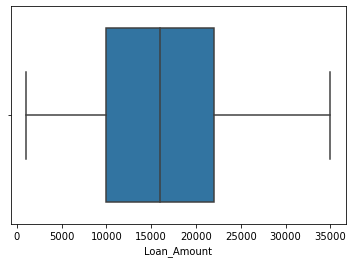

In [18]:
sns.boxplot(df['Loan_Amount'])

<AxesSubplot:xlabel='Funded_Amount'>

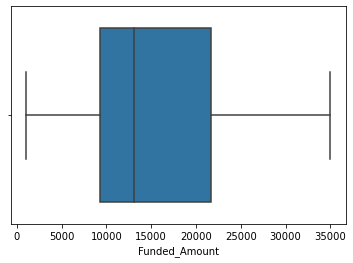

In [19]:
sns.boxplot(df['Funded_Amount'])

<AxesSubplot:xlabel='Funded_Amount_Investor'>

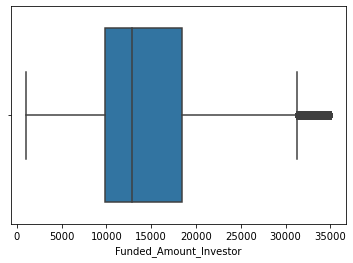

In [20]:
sns.boxplot(df['Funded_Amount_Investor'])

<AxesSubplot:xlabel='Interest_Rate'>

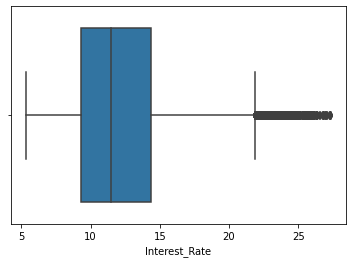

In [21]:
sns.boxplot(df['Interest_Rate'])

<AxesSubplot:xlabel='Debt_to_Income'>

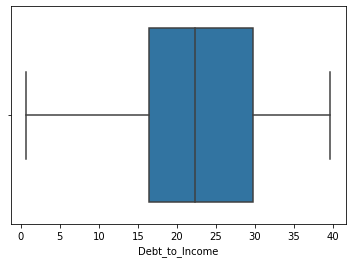

In [22]:
sns.boxplot(df['Debt_to_Income'])

<AxesSubplot:xlabel='Employment_Duration'>

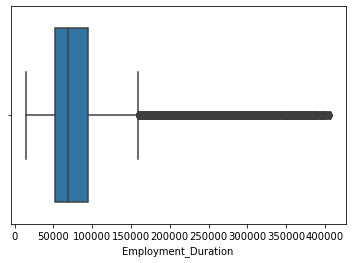

In [23]:
sns.boxplot(df['Employment_Duration'])

The unit of Employment Duration is not specified. However, as the range of values extends from 0 to 400000+, it appears to be number of hours. Hence, it is converted to years.

In [24]:
df['Employment_Duration'] = df['Employment_Duration']/(365*24)

<AxesSubplot:xlabel='Employment_Duration'>

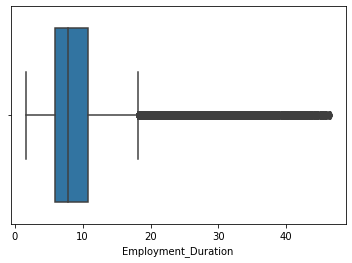

In [25]:
sns.boxplot(df['Employment_Duration'])

<AxesSubplot:xlabel='Available_Accounts'>

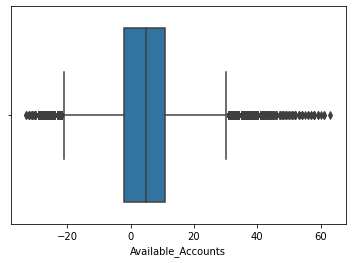

In [26]:
sns.boxplot(df['Available_Accounts'])

Available accounts cannot be negative values. This is mostly likely due to incorrect inputation of Total Accounts and Open Account where Open Account > Total Accounts. Hence, we will take the absolute values of Available_Accounts.

In [27]:
df['Available_Accounts'] = abs(df['Available_Accounts'])

#### Examining Loan Amount, Funded Amount and Funded Amount Investor

In [28]:
df.loc[(df['Loan_Amount']< df['Funded_Amount_Investor']) & (df['Loan_Amount']< df['Funded_Amount_Investor'])]

,Loan_Amount,Funded_Amount,Funded_Amount_Investor,Term,Batch_Enrolled,Interest_Rate,Grade,Home_Ownership,Employment_Duration,Verification_Status,Loan_Title,Debt_to_Income,Inquires__six_months,Public_Record,Initial_List_Status,Application_Type,Loan_Status,ind,Available_Accounts
1,7133,11650,12615.79560,59,BAT2833642,6.564296,B,MORTGAGE,4.346919,Source Verified,Credit card refinancing,18.157975,0,0,w,INDIVIDUAL,NaN,test,10
6,16214,16482,32939.84051,58,BAT1104812,7.403273,C,MORTGAGE,3.014673,Source Verified,Credit card refinancing,32.280671,0,0,f,INDIVIDUAL,NaN,test,2
7,7569,23752,22807.69607,36,BAT2078974,10.512555,B,MORTGAGE,7.492324,Source Verified,Credit card refinancing,18.187011,0,0,w,INDIVIDUAL,NaN,test,8
10,12429,16487,19194.48569,58,BAT2136391,10.141490,B,MORTGAGE,9.884359,Source Verified,Credit card refinancing,29.449584,0,0,w,INDIVIDUAL,NaN,test,39
14,3789,7104,11390.17398,58,BAT4351734,19.821265,C,MORTGAGE,5.691127,Verified,Credit card refinancing,19.340065,0,0,f,INDIVIDUAL,NaN,test,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67450,8664,34707,14474.59493,59,BAT2136391,9.468804,C,MORTGAGE,6.513565,Verified,Medical expenses,38.863933,0,0,f,INDIVIDUAL,0.0,train,6
67455,5127,16956,13917.48522,59,BAT2522922,19.388683,C,MORTGAGE,11.386819,Source Verified,Credit card refinancing,33.622294,0,0,f,INDIVIDUAL,0.0,train,8
67457,11440,17672,22965.76290,59,BAT2558388,15.025260,C,RENT,8.690501,Verified,Debt consolidation,21.929698,0,0,w,INDIVIDUAL,0.0,train,1
67459,8323,11046,15637.46301,59,BAT1780517,9.972104,C,RENT,7.476156,Source Verified,Credit card refinancing,17.694279,0,0,w,INDIVIDUAL,0.0,train,2


It is noticed that there are some observations where Loan Amount is lesser than Funded Amount and Funded Amount Investor. 

In [29]:
df.loc[(df['Funded_Amount_Investor']> df['Loan_Amount']) & (df['Funded_Amount_Investor']> df['Funded_Amount'])]

,Loan_Amount,Funded_Amount,Funded_Amount_Investor,Term,Batch_Enrolled,Interest_Rate,Grade,Home_Ownership,Employment_Duration,Verification_Status,Loan_Title,Debt_to_Income,Inquires__six_months,Public_Record,Initial_List_Status,Application_Type,Loan_Status,ind,Available_Accounts
1,7133,11650,12615.79560,59,BAT2833642,6.564296,B,MORTGAGE,4.346919,Source Verified,Credit card refinancing,18.157975,0,0,w,INDIVIDUAL,NaN,test,10
6,16214,16482,32939.84051,58,BAT1104812,7.403273,C,MORTGAGE,3.014673,Source Verified,Credit card refinancing,32.280671,0,0,f,INDIVIDUAL,NaN,test,2
10,12429,16487,19194.48569,58,BAT2136391,10.141490,B,MORTGAGE,9.884359,Source Verified,Credit card refinancing,29.449584,0,0,w,INDIVIDUAL,NaN,test,39
14,3789,7104,11390.17398,58,BAT4351734,19.821265,C,MORTGAGE,5.691127,Verified,Credit card refinancing,19.340065,0,0,f,INDIVIDUAL,NaN,test,14
16,9250,8009,15895.25957,36,BAT1930365,11.679298,C,RENT,5.611413,Verified,Credit card refinancing,13.916413,0,0,w,INDIVIDUAL,NaN,test,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67445,12597,10573,25849.54390,59,BAT1586599,15.255265,C,MORTGAGE,18.594222,Source Verified,Home improvement,22.809975,0,0,w,INDIVIDUAL,0.0,train,2
67446,16710,22491,26614.64494,58,BAT5341619,10.458293,C,MORTGAGE,4.342291,Not Verified,Credit card refinancing,19.171569,0,0,f,INDIVIDUAL,0.0,train,1
67457,11440,17672,22965.76290,59,BAT2558388,15.025260,C,RENT,8.690501,Verified,Debt consolidation,21.929698,0,0,w,INDIVIDUAL,0.0,train,1
67459,8323,11046,15637.46301,59,BAT1780517,9.972104,C,RENT,7.476156,Source Verified,Credit card refinancing,17.694279,0,0,w,INDIVIDUAL,0.0,train,2


Similarly, there are observations where Funded Amount Investor is greater than Funded Amount and Funded Amount Investor. 

Funded amount is the loan disbursed by the bank to the applicant/representative. Therefore, loan amount too cannot be less than the funded amount.
Similarly, funded amount investor cannot be more than the loan amount or funded amount. Funded amount investor could mean amount invested or funded by a third party investor. Essentially these values are outliers and have been interchanged. 

A possible solution for this problem is substitution of values by comparison of the three variables: Loan Amount, Funded Amount, Funded Amount Investor. 
 - Loan Amount > Funded Amount > Funded Amount Investor 

Hence, the lowest of these three variables in a particular observation has to be funded amount investor and highest will be the loan amount. 
Funded amount can be dropped as loan amount can be disbursed only after loan is approved. 

In [30]:
# Create new columns for Loan Amount and Funded Amount Investor
df['Actual_Loan_Amount'] = df['Loan_Amount']
df['Actual_Funded_Amount_Investor'] = df['Funded_Amount_Investor']

# Calculate the maximum value of the three columns for Loan Amount
df['Actual_Loan_Amount'] = df[['Loan_Amount','Funded_Amount','Funded_Amount_Investor']].max(axis=1)

# Calculate the minimum value of the three columns for Funded Amount Investor
df['Actual_Funded_Amount_Investor'] = df[['Loan_Amount','Funded_Amount','Funded_Amount_Investor']].min(axis=1)

In [31]:
## Loan Amount, Funded Amount and Funded Amount Investor are all dropped. 
df.drop(['Loan_Amount','Funded_Amount','Funded_Amount_Investor'], axis=1, inplace = True)

### Inconsistent Labels

In [32]:
df['Verification_Status'].unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

In [33]:
df['Loan_Title'].unique()

array(['Home improvement', 'Credit card refinancing',
       'Debt consolidation', 'Debt Consolidation', 'CC Loan',
       'credit card refinance', 'Credit Card Consolidation', 'MYLOAN',
       'Other', 'CC Consolidation', 'Moving and relocation', 'Car Loan',
       'Bill Payoff', 'Car financing', 'Personal', 'Credit Consolidation',
       'credit card consolidation', 'Home Improvement', 'Personal Loan',
       'Medical expenses', 'personal', 'Consolidation', 'CONSOLIDATE',
       'Refinance', 'Business', 'DEBT CONSOLIDATION', 'Major purchase',
       'Home Improvement Loan', 'refi', 'Credit Card Debt',
       'Consolidation Loan', 'consolidation loan', 'Vacation',
       'debt consolidation', 'consolidate', 'Consolidate',
       'Credit card payoff', 'Credit Card Refinance', 'home improvement',
       'payoff', 'Debt Consolidation Loan', 'Credit Cards',
       'CC-Refinance', 'Debt payoff', 'debt consolidation loan',
       'Credit card pay off', 'Green loan', 'loan1', 'credit card',


Columns Verification Status and Loan Title have inconsistent labels. It can be corrected using dictionaries for each column.

In [34]:
## Correct the labels in Verification Status
dict = {'Source Verified': 'Verified','Verified':'Verified','Not Verified':'Not Verified'}
df['Verification_Status'].replace(dict, inplace = True)

In [35]:
title = pd.DataFrame(df['Loan_Title'].value_counts())

In [36]:
## Correct the labels in Loan Title
title_dict = {'Debt Consolidation 2013': 'debt_consolidation','Debt Reduction':'debt_consolidation','Debt':'debt_consolidation','conso':'debt_consolidation',
'debt loan': 'debt_consolidation','get out of debt':'debt_consolidation','Consolidated':'debt_consolidation','Debt Payoff':'debt_consolidation',
'Loan Consolidation': 'debt_consolidation','relief':'debt_consolidation','Lending Club':'debt_consolidation','Debt Loan':'debt_consolidation',
'CONSOLIDATION': 'debt_consolidation','Get Debt Free':'debt_consolidation','Freedom':'debt_consolidation','consolidation':'debt_consolidation','Lending loan':'debt_consolidation',
'Debt Free': 'debt_consolidation','Debt Consolidation Loan':'debt_consolidation','Debt payoff':'debt_consolidation','debt consolidation loan':'debt_consolidation',
'Consolidation': 'debt_consolidation','Debt Consolidation':'debt_consolidation','Debt consolidation':'debt_consolidation','CONSOLIDATE':'debt_consolidation',
'DEBT CONSOLIDATION': 'debt_consolidation','Consolidation Loan':'debt_consolidation','consolidation loan':'debt_consolidation','debt consolidation':'debt_consolidation',
'consolidate': 'debt_consolidation','Consolidate':'debt_consolidation','debt':'debt_consolidation','Credit Card':'credit_card','Credit Card consolidation':'credit_card',
'Dept consolidation':'debt_consolidation','CC Refi': 'credit_card','pay off bills':'credit_card','CC-Refinance':'credit_card','Refinance Loan':'credit_card',
'bills': 'credit_card','Credit':'credit_card','Credit Card Paydown':'credit_card','Credit Card Refinance Loan':'credit_card',
'credit pay off': 'credit_card','Credit card refinancing':'credit_card','CC Loan':'credit_card','credit card refinance':'credit_card',
'Credit Card Loan': 'credit_card','Credit Card Consolidation':'credit_card','Card Consolidation':'credit_card','CC consolidation':'credit_card',
'Bill Payoff': 'credit_card','Credit Consolidation':'credit_card','credit card consolidation':'credit_card','Refinance':'credit_card',
'refi':'credit_card','Credit Card Debt':'credit_card','Credit card payoff':'credit_card','Credit Card Refinance':'credit_card','CC Consolidation':'credit_card',
'payoff':'credit_card','Credit Cards':'credit_card','CC Refinance':'credit_card','Credit card pay off':'credit_card','cards':'credit_card',
'credit card':'credit_card','Credit Card Refi':'credit_card','Cards':'credit_card','Pay Off':'credit_card',
'Credit Loan':'credit_card','Credit Card Payoff':'credit_card','CC':'credit_card','Payoff':'credit_card',
'Credit card refinance':'credit_card','Bill Consolidation':'credit_card','Credit payoff':'credit_card','Home improvement':'BuyingHouse&HomeImprovement',
'Home Improvement':'BuyingHouse&HomeImprovement','Home Improvement Loan':'BuyingHouse&HomeImprovement','home improvement':'BuyingHouse&HomeImprovement','Pool':'BuyingHouse&HomeImprovement',
'Home buying':'BuyingHouse&HomeImprovement','House':'BuyingHouse&HomeImprovement','Home':'BuyingHouse&HomeImprovement','Bathroom':'BuyingHouse&HomeImprovement',
'Home loan':'BuyingHouse&HomeImprovement','Getting Ahead': 'BuyingHouse&HomeImprovement','Moving and relocation':'moving','other':'Other','vacation':'vacation',
'Vacation':'vacation','Wedding Loan':'wedding','MYLOAN':'personal','Personal':'personal',
'Personal Loan': 'personal','loan1':'personal','Loan 1':'personal','My Loan':'personal',
'Loan': 'personal','Personal loan':'personal','Major purchase':'major_purchase','Medical expenses':'medical',
'Medical loan': 'medical','Medical':'medical','Car Loan':'car','Car financing':'car',
'car':'car','Business': 'business','Green loan':'renewable_energy'}
df['Loan_Title'].replace(title_dict, inplace = True)

In [37]:
df['Loan_Title'].unique()

array(['BuyingHouse&HomeImprovement', 'credit_card', 'debt_consolidation',
       'personal', 'Other', 'moving', 'car', 'medical', 'business',
       'major_purchase', 'vacation', 'renewable_energy', 'wedding'],
      dtype=object)

## Splitting into Train and Test Dataset

In [38]:
test, train = df[df['ind'].eq('test')], df[df['ind'].eq('train')]

In [39]:
# Drop 'ind' column from test and train datasets
train.drop(['ind'], axis=1, inplace=True)
test.drop(['ind','Loan_Status'], axis=1, inplace=True)

1. Overall Distribution of Loan Status

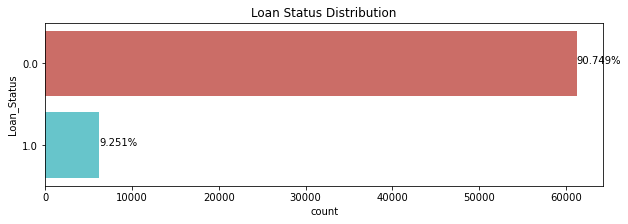

In [40]:
## Overall distribution of Loan Status

#Countplot of loan status
plt.figure(figsize=(10,3))
ax=sns.countplot(y='Loan_Status',data=df, palette='hls',order = train['Loan_Status'].value_counts().index)
plt.title('Loan Status Distribution')
total = len(train['Loan_Status'])
for p in ax.patches:
        percentage = '{:.3f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

Out of 67463 loan applicants, 90.75% applicants are non-defaulters and 9.25% have defaulted. 

This also means that the train dataset is imbalanced. To resolve this, stratified K-fold cross validation with shuffle setting as True will be used to ensure equal distribution of the Loan Status labels during building the model.

## Encoding Categorical Variables

As we will be using tree-based algorithms for building the model, we shall choose label encoding for encoding categorical variables. 

In [41]:
features = ['Grade','Home_Ownership','Verification_Status','Initial_List_Status','Application_Type','Loan_Title', 'Batch_Enrolled']

le = LabelEncoder()

# Fit the encoder and tranform each column
for col in features:
    train.loc[:, col]= le.fit_transform(train[col])
    test.loc[:, col]= le.transform(test[col])

train = pd.DataFrame(train, columns = train.columns)
test = pd.DataFrame(test, columns = test.columns)

### Splitting into X and y

In [42]:
X_train = train.drop(columns = ['Loan_Status'], axis=1)
y_train = train['Loan_Status']

In [43]:
y_train.unique()

array([0., 1.])

## Scaling

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67463 entries, 0 to 67462
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Term                           67463 non-null  int64  
 1   Batch_Enrolled                 67463 non-null  int32  
 2   Interest_Rate                  67463 non-null  float64
 3   Grade                          67463 non-null  int32  
 4   Home_Ownership                 67463 non-null  int32  
 5   Employment_Duration            67463 non-null  float64
 6   Verification_Status            67463 non-null  int32  
 7   Loan_Title                     67463 non-null  int32  
 8   Debt_to_Income                 67463 non-null  float64
 9   Inquires__six_months           67463 non-null  int64  
 10  Public_Record                  67463 non-null  int64  
 11  Initial_List_Status            67463 non-null  int32  
 12  Application_Type               67463 non-null 

In [45]:
# List for columns to scale
cols_to_scale = ['Term','Interest_Rate','Employment_Duration','Debt_to_Income','Inquires__six_months','Public_Record',
'Available_Accounts','Actual_Loan_Amount','Actual_Funded_Amount_Investor']

# Create scaler
scaler = StandardScaler()

# Create a copy of the datasets
X_train_scaled = X_train.copy()
test_scaled = test.copy()

# Scale selected data
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
test_scaled[cols_to_scale] = scaler.transform(test[cols_to_scale])
test_scaled = pd.DataFrame(test_scaled, columns = test.columns)

In [46]:
X_train_scaled

,Term,Batch_Enrolled,Interest_Rate,Grade,Home_Ownership,Employment_Duration,Verification_Status,Loan_Title,Debt_to_Income,Inquires__six_months,Public_Record,Initial_List_Status,Application_Type,Available_Accounts,Actual_Loan_Amount,Actual_Funded_Amount_Investor
0,0.248297,16,-0.191268,1,0,2.127642,0,5,-0.829943,-0.307961,-0.234958,1,0,-0.412089,1.361814,0.133911
1,0.248297,4,0.105229,2,2,-0.904035,1,5,-0.933158,-0.307961,-0.234958,0,0,-1.132752,-1.516654,-1.456003
2,0.248297,11,0.188142,5,0,0.243515,1,5,0.572470,-0.307961,-0.234958,1,0,-0.412089,0.793129,-0.037494
3,0.248297,15,1.313651,2,0,0.616163,1,5,-0.621824,-0.307961,-0.234958,1,0,-0.556221,-0.700223,-0.623854
4,0.248297,32,0.850331,2,0,-0.806299,1,4,-0.720484,6.030678,2.650186,1,0,0.020309,-0.841986,0.936455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67458,0.248297,21,-0.655461,2,0,0.075944,1,4,0.568625,-0.307961,-0.234958,1,0,-0.412089,-1.314311,-0.650224
67459,0.248297,7,-0.503994,2,2,-0.334239,1,4,-0.663171,-0.307961,-0.234958,1,0,-0.988619,-1.021859,-0.283283
67460,0.248297,5,2.098823,0,0,-1.015518,1,5,-1.538551,-0.307961,2.650186,1,0,-0.988619,1.460186,0.713419
67461,0.248297,14,0.355735,3,1,0.364152,0,5,-1.855781,-0.307961,-0.234958,0,0,-1.132752,-0.200967,-1.116178


## Feature Selection

In [47]:
# Defin feature selection 
selector = SelectKBest(f_regression, k = 'all')

# Apply transformation to the training set
X_new = selector.fit_transform(X_train_scaled, y_train)  

# Get names of the selected features
mask = selector.get_support()     

# Scores for selected features
print(selector.scores_)     

# Get a list of selected features
new_features = X_train_scaled.columns[mask]
print(new_features)   

X = X_train_scaled[new_features]
test = test_scaled[new_features]

[7.84323001e-01 4.12242175e+00 5.67292449e-01 9.16882431e+00
 9.59767792e+00 9.31442970e-01 3.99485730e-02 1.25643378e+00
 6.30579087e-01 2.25560917e-02 7.56695859e+00 1.21961813e+01
 1.39153699e-02 5.02477458e+00 7.21468716e-03 4.96289671e+00]
Index(['Term', 'Batch_Enrolled', 'Interest_Rate', 'Grade', 'Home_Ownership',
       'Employment_Duration', 'Verification_Status', 'Loan_Title',
       'Debt_to_Income', 'Inquires__six_months', 'Public_Record',
       'Initial_List_Status', 'Application_Type', 'Available_Accounts',
       'Actual_Loan_Amount', 'Actual_Funded_Amount_Investor'],
      dtype='object')


## Building the Machine Learning Models

In [48]:
# Implement cross validation
def skfold_cv(X, y, algorithm, params,n_jobs=-1):
    skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
 
 
    for train_index , test_index in skf.split(X,y):
        X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]

        model = algorithm(**params) 
        model.fit(X_train,y_train)
        pred = model.predict_proba(X_test)[:,1]
        pred_clipped = np.clip(pred,0.05,0.95)

        score = log_loss(y_test, pred)
        print(f'score: {score}')
        
    return model
   

### 1. Logistic Regression Model

In [49]:
## Initial Logit model
logit_params = {}
logit_model = skfold_cv(X,y_train,LogisticRegression,logit_params)

score: 0.30827159703632706
score: 0.30821524209730217
score: 0.30825848539322215
score: 0.3080806876093029
score: 0.30800657054884867


In [50]:
# Hyperparameter Tuning for Logistic Regression
from sklearn import model_selection

# Define a grid of parameters
param_grid = {'penalty': ['l1','l2'],
'C': [0.001,0.01,0.1,1,10,100],}

# Initialize grid search
classifier = LogisticRegression(n_jobs=-1,random_state=42)

model = model_selection.RandomizedSearchCV(estimator=classifier,
param_distributions=param_grid,
scoring='neg_log_loss',
verbose=10,
n_jobs=1,
cv=StratifiedKFold(5,shuffle=True))

# Fit the model and extract best score
model.fit(X, y_train)
print(f'Best score: {model.best_score_}')
print('Best parameters set:')
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f'\t{param_name}: {best_parameters[param_name]}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START C=100, penalty=l1..........................................
[CV 1/5; 1/10] END .............C=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5; 1/10] START C=100, penalty=l1..........................................
[CV 2/5; 1/10] END .............C=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/5; 1/10] START C=100, penalty=l1..........................................
[CV 3/5; 1/10] END .............C=100, penalty=l1;, score=nan total time=   0.0s
[CV 4/5; 1/10] START C=100, penalty=l1..........................................
[CV 4/5; 1/10] END .............C=100, penalty=l1;, score=nan total time=   0.0s
[CV 5/5; 1/10] START C=100, penalty=l1..........................................
[CV 5/5; 1/10] END .............C=100, penalty=l1;, score=nan total time=   0.0s
[CV 1/5; 2/10] START C=100, penalty=l2..........................................
[CV 1/5; 2/10] END ..........C=100, penalty=l2;,

In [51]:
## Logit model with tuned hyperparameters
logit_params = {'penalty':'l2','C': 0.001}
logit_model = skfold_cv(X,y_train,LogisticRegression,logit_params)

score: 0.30823440001211855
score: 0.30802952033531933
score: 0.30823693844660865
score: 0.30807866858653543
score: 0.30799747404415756


### 2. Random Forest Model

In [52]:
## Initial Random Forest model
rf_params = {}
rf_model = skfold_cv(X, y_train,RandomForestClassifier,rf_params)

score: 0.31930083653580865
score: 0.3202766443031711
score: 0.3219234513423791
score: 0.3239504518546008
score: 0.3171986830254164


In [53]:
## Hyperparameter Tuning for Random Forest Classifier
from sklearn import model_selection

# Define a grid of parameters
param_grid = {'n_estimators': [100, 200, 250, 300, 400, 500],
'max_depth': [1, 2, 5, 7, 11, 15],
'criterion': ['gini', 'entropy'],
'min_samples_split': [1, 2, 5, 10, 15, 100],
'min_samples_leaf': [1, 2, 5, 10],
'max_features': ['log2', 'sqrt','None']}

# Initialize randomized search
classifier = RandomForestClassifier(n_jobs=-1,random_state=42)

model = model_selection.RandomizedSearchCV(estimator=classifier,
param_distributions=param_grid,
scoring='neg_log_loss',
verbose=10,
n_jobs=1,
cv=StratifiedKFold(5,shuffle=True))

# Fit the model and extract best score
model.fit(X, y_train)
print(f'Best score: {model.best_score_}')
print('Best parameters set:')
best_parameters = model.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print(f'\t{param_name}: {best_parameters[param_name]}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=1, n_estimators=100
[CV 1/5; 1/10] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=1, n_estimators=100;, score=nan total time=   0.3s
[CV 2/5; 1/10] START criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=1, n_estimators=100
[CV 2/5; 1/10] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=1, n_estimators=100;, score=nan total time=   1.5s
[CV 3/5; 1/10] START criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=1, n_estimators=100
[CV 3/5; 1/10] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=10, min_samples_split=1, n_estimators=100;, score=nan total time=   1.5s
[CV 4/5; 1/10] START criterion=gini, max_depth=1, max_features=log2, min_samples_lea

[CV 4/5; 6/10] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-0.308 total time=   1.4s
[CV 5/5; 6/10] START criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100
[CV 5/5; 6/10] END criterion=entropy, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=100;, score=-0.308 total time=   1.4s
[CV 1/5; 7/10] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=1, n_estimators=100
[CV 1/5; 7/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=1, n_estimators=100;, score=nan total time=   0.1s
[CV 2/5; 7/10] START criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=1, n_estimators=100
[CV 2/5; 7/10] END criterion=entropy, max_depth=5, max_features=log2, min_samples_leaf=5, min_samples_split=1, n_estimato

In [54]:
## Random Forest model with tuned hyperparameters
rf_params = {'n_estimators':200,
'max_depth': 5,'criterion': 'gini',
'min_samples_split': 5,
'min_samples_leaf': 10,
'max_features':'log2'} 
rf_model = skfold_cv(X, y_train,RandomForestClassifier,rf_params)

score: 0.30829011407622636
score: 0.3078268420242598
score: 0.30833508536905263
score: 0.30807100779984614
score: 0.30806822457033106


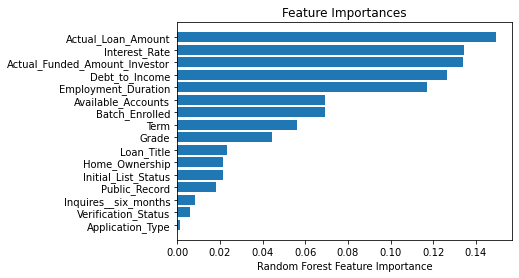

In [55]:
col_names = X.columns
importances = rf_model.feature_importances_
idxs = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

Although both logistic model and random forest model perform well with close log loss values, the random forest model with tuned hyperparameters is choosen as the final model.

## Predicting results for Test dataset

In [56]:
rf_model.fit(X, y_train)
pred_rf= rf_model.predict_proba(test)[:,1]
pred_clipped = np.clip(pred_rf,0.05,0.95)

The use of this log loss as the evaluation metric will mete out extreme punishments for being both confident and wrong. In the worst possible case, a prediction which is true when it is actually false will add an huge amount to your error score. Therefore, it will be much better to keep our probabilities between 0.025–0.975 so that we are never very sure about our prediction.

In [57]:
pred_clipped

array([0.09587774, 0.09310522, 0.09226162, ..., 0.10198574, 0.09796671,
       0.09732989])

### Adding Predicted Values to the Submission File

In [58]:
submission = pd.read_csv('submission.csv')
submission['Loan Status'] = pred_clipped
submission.to_csv('submission.csv', index=False)